In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
file_path = '/content/REGLEMENTS_CARTES_PREPAYEES_FAST_FOOD-_2_.csv'

In [18]:
df = pd.read_csv(file_path)

In [19]:
# Explore the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   ID_Règlement  ID_Operation Date_Règlement Heure_Règlement        Paiement  \
0        287967     700877295     2024-02-29        08:07:37  Carte prépayée   
1        287983     700877305     2024-02-29        08:17:54  Carte prépayée   
2        287994     700877312     2024-02-29        08:23:33  Carte prépayée   
3        282957     700874995     2024-02-22        11:19:17  Carte prépayée   
4        282972     700874999     2024-02-22        11:31:14  Carte prépayée   

   Référence  Montant_Rgl  Montant_Versé  Montant_Rst ID_Client  ...  \
0        NaN         13.5           13.5          0.0  CLT10001  ...   
1        NaN          8.0            8.0          0.0  CLT10001  ...   
2        NaN         20.0           20.0          0.0  CLT10001  ...   
3        NaN         87.0           87.0          0.0  CLT10001  ...   
4        NaN          5.0            5.0          0.0  CLT10001  ...   

  Bénéficiaire_CPP Solde_CPP ID_Restaurant  \
0          

In [20]:
print("\nBasic statistics for numerical columns:")
print(df.describe())


Basic statistics for numerical columns:
        ID_Règlement  ID_Operation     Référence   Montant_Rgl  Montant_Versé  \
count   15222.000000  1.522200e+04  9.900000e+01  15222.000000   15222.000000   
mean   304552.634673  6.415931e+08  5.541115e+15     33.954553      33.954553   
std     38098.097638  1.482726e+08  3.240446e+15     59.042239      59.042240   
min    250355.000000  2.019016e+08  5.850000e+02      1.500000       1.500000   
25%    271202.750000  5.005158e+08  2.759346e+15     10.000000      10.000000   
50%    299481.500000  7.008713e+08  4.293358e+15     24.000000      24.000000   
75%    334226.750000  7.008972e+08  9.432400e+15     45.000000      45.000000   
max    388034.000000  9.061058e+08  9.942445e+15   2799.527996    2799.528076   

        Montant_Rst     Solde_CPP  Pointage  
count  1.522200e+04  15222.000000       0.0  
mean  -1.406516e-08    631.318233       NaN  
std    1.320466e-06    671.655797       NaN  
min   -9.918212e-05      1.500000       NaN  

In [21]:

print(df[['Date_Règlement', 'Heure_Règlement']].head())

  Date_Règlement Heure_Règlement
0     2024-02-29        08:07:37
1     2024-02-29        08:17:54
2     2024-02-29        08:23:33
3     2024-02-22        11:19:17
4     2024-02-22        11:31:14


In [22]:
# Convert 'Date_Règlement' to datetime
df['Date_Règlement'] = pd.to_datetime(df['Date_Règlement'], errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15222 entries, 0 to 15221
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Règlement      15222 non-null  int64         
 1   ID_Operation      15222 non-null  int64         
 2   Date_Règlement    15222 non-null  datetime64[ns]
 3   Heure_Règlement   15222 non-null  object        
 4   Paiement          15222 non-null  object        
 5   Référence         99 non-null     float64       
 6   Montant_Rgl       15222 non-null  float64       
 7   Montant_Versé     15222 non-null  float64       
 8   Montant_Rst       15222 non-null  float64       
 9   ID_Client         10690 non-null  object        
 10  Client            10690 non-null  object        
 11  ID_CartePP        15222 non-null  object        
 12  Bénéficiaire_CPP  14668 non-null  object        
 13  Solde_CPP         15222 non-null  float64       
 14  ID_Restaurant     1522

In [24]:
df['Heure_Règlement'] = pd.to_datetime(df['Heure_Règlement'], format='%H:%M:%S').dt.hour

In [25]:
print(df[['Date_Règlement', 'Heure_Règlement']].head())

  Date_Règlement  Heure_Règlement
0     2024-02-29                8
1     2024-02-29                8
2     2024-02-29                8
3     2024-02-22               11
4     2024-02-22               11


In [26]:
# Convert 'Montant_Rgl' to numeric, coerce errors (turn invalid data to NaN)
df['Montant_Rgl'] = pd.to_numeric(df['Montant_Rgl'], errors='coerce')

In [27]:
# I want too : Drop rows with NaN values in 'Montant_Rgl'
df = df.dropna(subset=['Montant_Rgl'])

In [28]:
print(df['Montant_Rgl'])

0        13.5
1         8.0
2        20.0
3        87.0
4         5.0
         ... 
15217     7.0
15218    35.0
15219    54.0
15220     5.0
15221     8.0
Name: Montant_Rgl, Length: 15222, dtype: float64


In [29]:
# No)w, you can safely group and sum the data
daily_trends = df.groupby(df['Date_Règlement'])['Montant_Rgl'].sum()
weekly_trends = df.groupby(df['Date_Règlement'].dt.to_period('W'))['Montant_Rgl'].sum()
monthly_trends = df.groupby(df['Date_Règlement'].dt.to_period('M'))['Montant_Rgl'].sum()

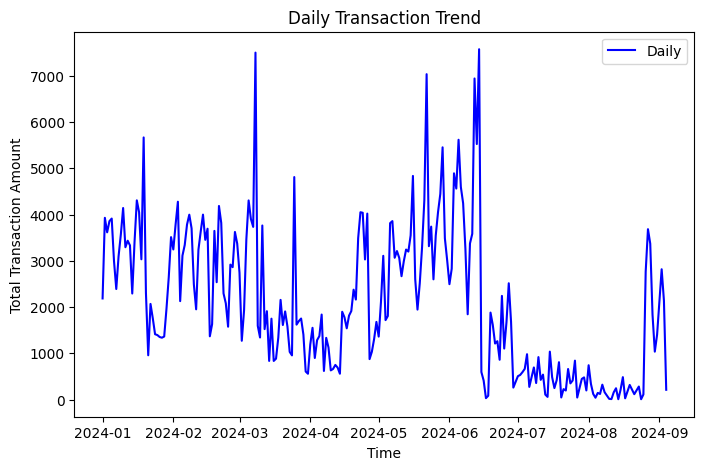

In [68]:
# Plotting the daily trend
plt.figure(figsize=(8, 5))
plt.plot(daily_trends, label='Daily', color='blue')
plt.title('Daily Transaction Trend')
plt.xlabel('Time')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.show()

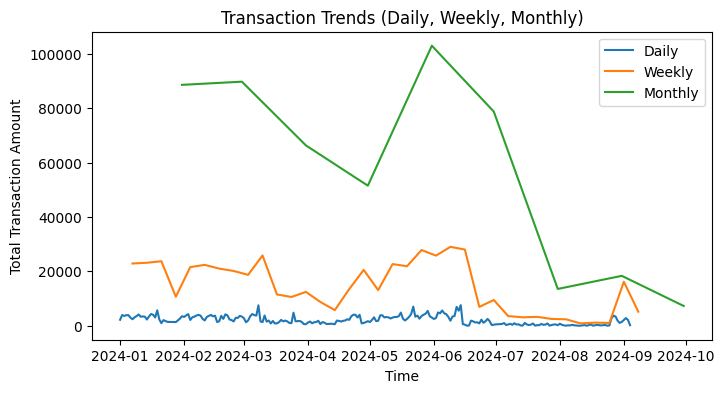

In [30]:
# Plotting the trends
plt.figure(figsize=(8, 4))
plt.plot(daily_trends, label='Daily')
plt.plot(weekly_trends, label='Weekly')
plt.plot(monthly_trends, label='Monthly')
plt.title('Transaction Trends (Daily, Weekly, Monthly)')
plt.xlabel('Time')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.show()

In [31]:
# Convert 'Solde_CPP' to numeric, handling any errors by setting invalid entries to NaN
df['Solde_CPP'] = pd.to_numeric(df['Solde_CPP'], errors='coerce')

In [32]:
# Group by date and calculate the average prepaid card balance
daily_balance_trends = df.groupby(df['Date_Règlement'].dt.date)['Solde_CPP'].mean()

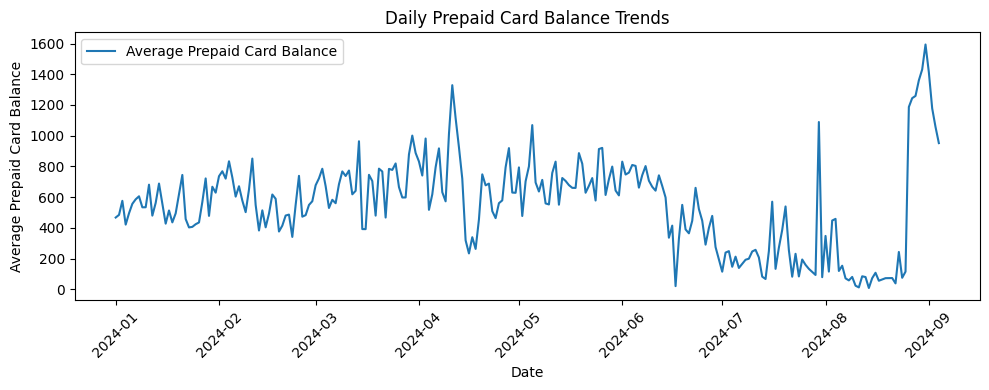

In [33]:
# Plotting the balance trends

plt.figure(figsize=(10, 4))
plt.plot(daily_balance_trends, label='Average Prepaid Card Balance')
plt.title('Daily Prepaid Card Balance Trends')
plt.xlabel('Date')
plt.ylabel('Average Prepaid Card Balance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# Group by customer and calculate total and average spending
top_spenders = df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].agg(['sum', 'mean']).sort_values('sum', ascending=False)

In [69]:
# Top 10 customers by total spending
top_10_spenders = top_spenders.head(10)
top_10_spenders

,sum,mean
Bénéficiaire_CPP,,
RIFAI,17737.572536,347.795540
CHAGH,12992.532396,81.203327
SELMANI,12726.843949,49.909192
BOUICHENADE,11338.000000,78.736111
REGRAGUI,10653.672295,71.501156
DOUDOUH,10428.100000,38.338603
EL YAAGOUBI,10137.209394,81.751689
MINTOAMA,9119.000000,44.921182
EL MOUNTADAR,8889.065796,50.506056


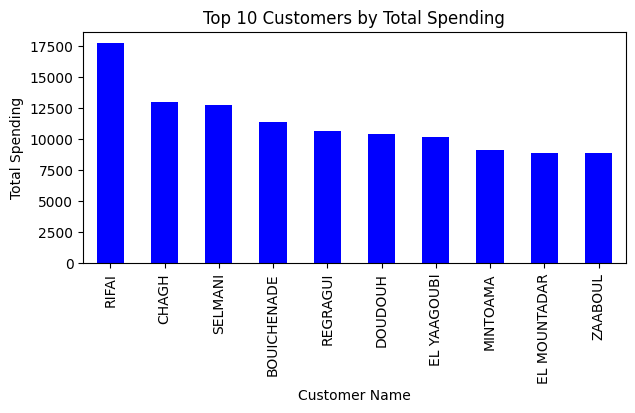

In [36]:
# Plotting the top spenders
plt.figure(figsize=(7, 3))
top_10_spenders['sum'].plot(kind='bar', color='BLUE')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending')
plt.show()

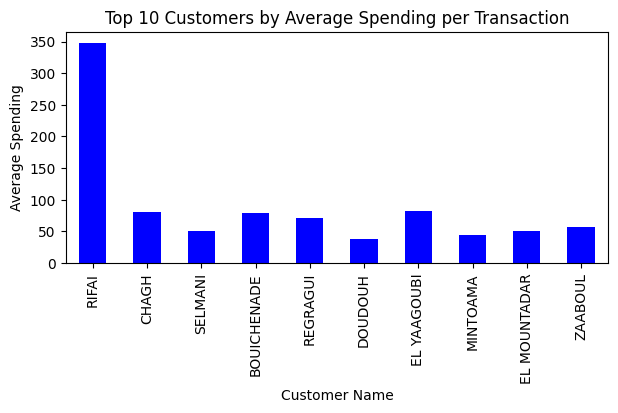

In [37]:
# Plot for average spending
plt.figure(figsize=(7, 3))
top_10_spenders['mean'].plot(kind='bar', color='blue')
plt.title('Top 10 Customers by Average Spending per Transaction')
plt.xlabel('Customer Name')
plt.ylabel('Average Spending')
plt.show()

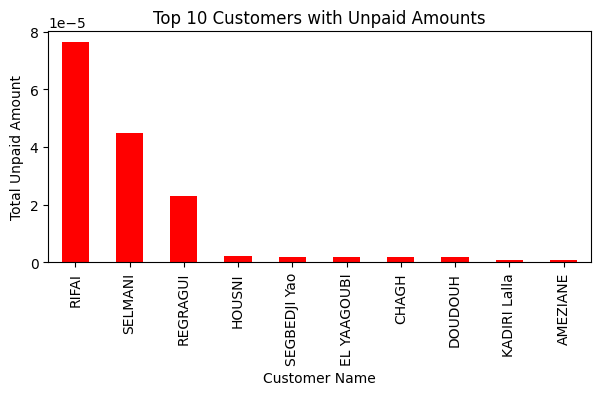

In [38]:
# Filter transactions with unpaid amounts
unpaid_transactions = df[df['Montant_Rst'] > 0]
top_unpaid_customers = unpaid_transactions.groupby('Bénéficiaire_CPP')['Montant_Rst'].sum().sort_values(ascending=False).head(10)

# Plot top 10 customers with unpaid amounts
plt.figure(figsize=(7, 3))
top_unpaid_customers.plot(kind='bar', color='red')
plt.title('Top 10 Customers with Unpaid Amounts')
plt.xlabel('Customer Name')
plt.ylabel('Total Unpaid Amount')
plt.show()

# Filter transactions with zero prepaid card balance
zero_balance_customers = df[df['Solde_CPP'] == 0]


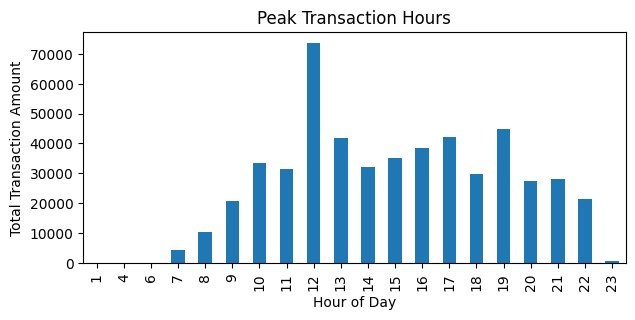

In [39]:
# Analyze peak transaction hours

peak_hours = df.groupby('Heure_Règlement')['Montant_Rgl'].sum()

# Plotting peak hours
plt.figure(figsize=(7, 3))
peak_hours.plot(kind='bar')
plt.title('Peak Transaction Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Total Transaction Amount')
plt.show()

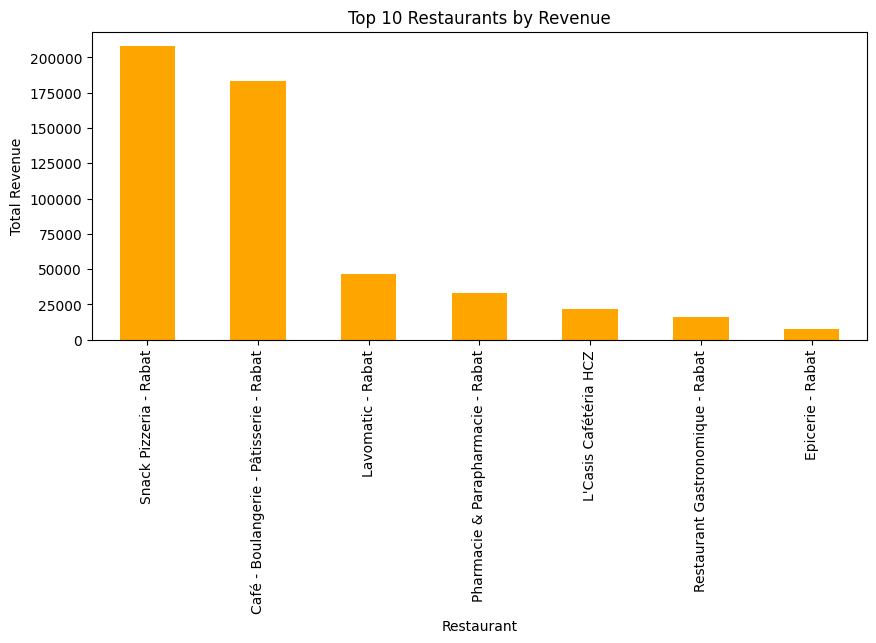

In [40]:
# Analyze top-performing restaurant locations
top_restaurants = df.groupby('Restaurant')['Montant_Rgl'].sum().sort_values(ascending=False).head(10)

# Plotting top 10 restaurants by revenue
plt.figure(figsize=(10, 4))
top_restaurants.plot(kind='bar', color='orange')
plt.title('Top 10 Restaurants by Revenue')
plt.xlabel('Restaurant')
plt.ylabel('Total Revenue')
plt.show()

In [41]:
# Calculate IQR for transaction amounts
Q1 = df['Montant_Rgl'].quantile(0.25)
Q3 = df['Montant_Rgl'].quantile(0.75)
IQR = Q3 - Q1

In [42]:
print(IQR)

35.0


In [43]:
# Define lower and upper bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [44]:
# Filter anomalies
anomalies = df[(df['Montant_Rgl'] < lower_bound) | (df['Montant_Rgl'] > upper_bound)]

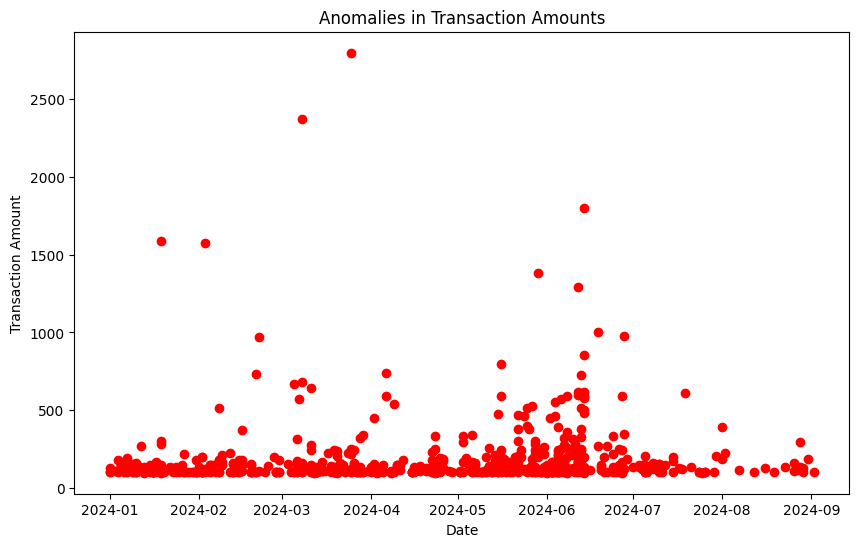

In [45]:
# Plotting anomalies
plt.figure(figsize=(10, 6))
plt.scatter(anomalies['Date_Règlement'], anomalies['Montant_Rgl'], color='red', label='Anomalies')
plt.title('Anomalies in Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


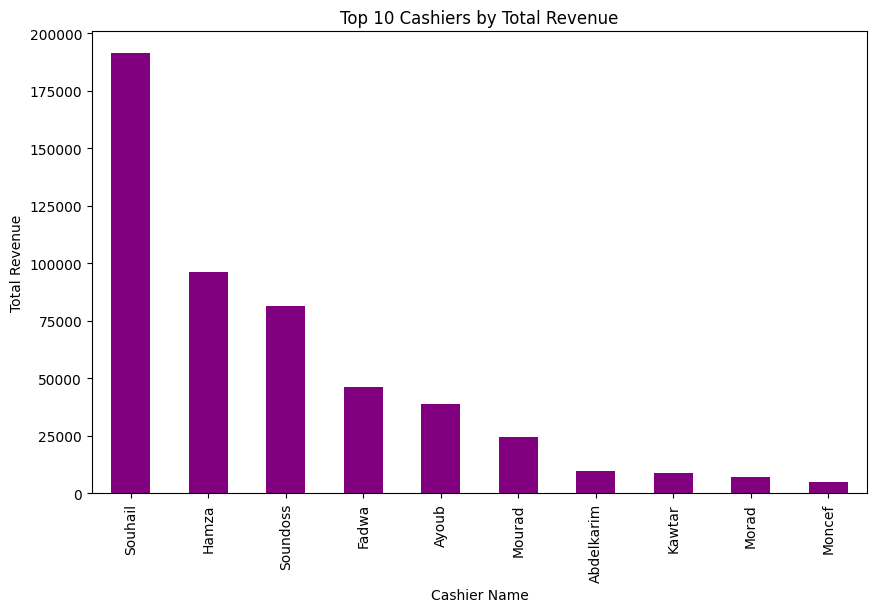

In [46]:
# Analyze cashier performance by total transactions and total revenue
cashier_performance = df.groupby('Prenom User')['Montant_Rgl'].agg(['sum', 'count']).sort_values('sum', ascending=False)

# Plotting cashier performance
plt.figure(figsize=(10, 6))
cashier_performance['sum'].head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Cashiers by Total Revenue')
plt.xlabel('Cashier Name')
plt.ylabel('Total Revenue')
plt.show()

Correlation between Transaction Amount and Prepaid Card Balance: 0.178338886683358

Correlation Matrix:
             Montant_Rgl  Solde_CPP
Montant_Rgl     1.000000   0.178339
Solde_CPP       0.178339   1.000000


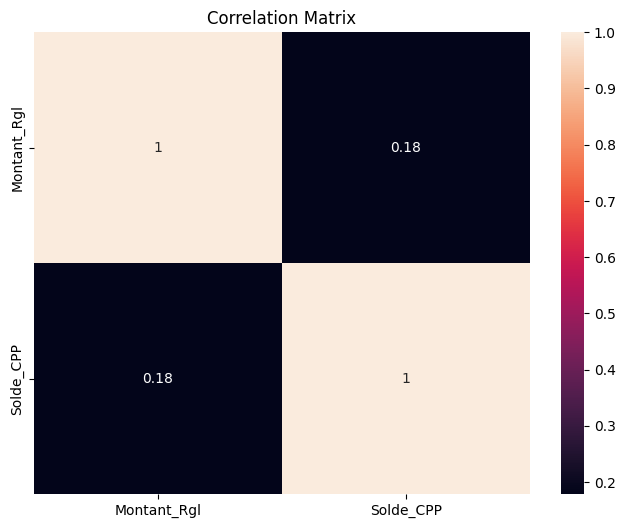

In [72]:
# prompt: help me do the corelation  as the subject say

# Calculate the correlation between 'Montant_Rgl' and 'Solde_CPP'
correlation = df['Montant_Rgl'].corr(df['Solde_CPP'])
print(f"Correlation between Transaction Amount and Prepaid Card Balance: {correlation}")

# Correlation matrix for multiple variables
correlation_matrix = df[['Montant_Rgl', 'Solde_CPP']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# You can also create a heatmap to visualize correlations
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix , annot=True)
plt.title('Correlation Matrix')
plt.show()

In [59]:
cour_grpd = df.groupby('Bénéficiaire_CPP').agg({'Montant_Rgl':'sum','Solde_CPP':'sum'})
print(cour_grpd)

                     Montant_Rgl  Solde_CPP
Bénéficiaire_CPP                           
AABID                 259.500000     729.00
AABIL                2824.900002   71232.92
AARAB                7205.000000  155300.56
AARIBECHE              28.000000     130.50
AAYLA                 184.625000     914.09
...                          ...        ...
meryem el             108.000000     369.50
nassri                 33.740000     183.76
nouhaila alaoui ait    36.000000     159.00
rhazal                 30.000000     295.02
sylla                  97.000000     167.00

[855 rows x 2 columns]


In [62]:
#matrix de corr
cour_grpd.corr()


,Montant_Rgl,Solde_CPP
Montant_Rgl,1.000000,0.895376
Solde_CPP,0.895376,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

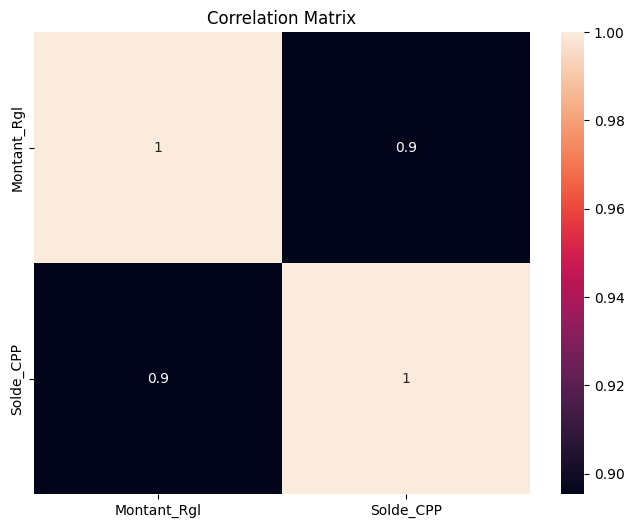

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(cour_grpd.corr(), annot=True)
plt.title('Correlation Matrix')

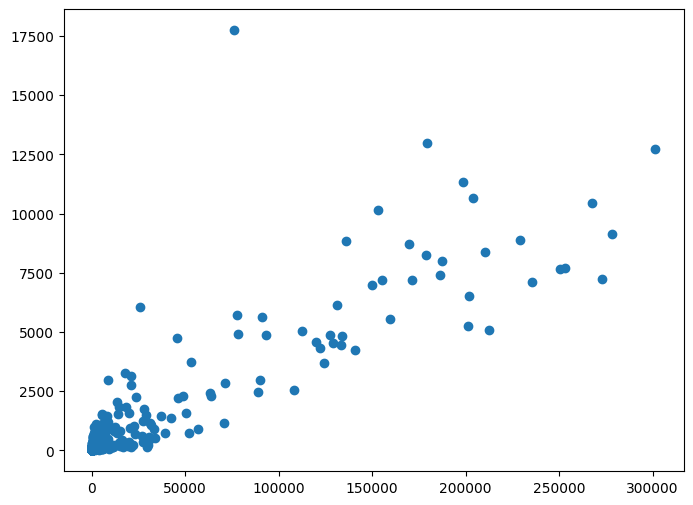

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(cour_grpd['Solde_CPP'],cour_grpd['Montant_Rgl'])